## Data Description

### Asteriod Classification

Data Source: The data has been collected from the NASA Open API available here The data is about Asteroids - NeoWs NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

Dimension:4687*40

Size:2.4 MB

Data Types:

Data Type Number of columns ID 2 Continuous 30 Categorical 2 DateTime 2 Nominal 1 Raw Data: API

**Problem Statement** : Identify whether the asteroids are hazardous or not based on the given features.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import time

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
nasa_data = pd.read_csv("C:/Users/Aravind/Desktop/ML Assignment/PCA/Assignment/NASA.csv")
nasa_data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
nasa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

**There are no missing values**

## Question : Perform Descriptive Statistics on the dataset and come up with insights on shape, spread and central deviation 

In [5]:
nasa_data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [14]:
nasa_data.corr()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Neo Reference ID,1.000000,1.000000,0.602381,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,...,-0.175461,-0.026381,0.040058,0.130486,-0.007669,0.006318,0.003031,-0.051685,-0.020719,-0.269028
Name,1.000000,1.000000,0.602381,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,-0.499821,...,-0.175461,-0.026381,0.040058,0.130486,-0.007669,0.006318,0.003031,-0.051685,-0.020719,-0.269028
Absolute Magnitude,0.602381,0.602381,1.000000,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,...,-0.459632,-0.011470,-0.206774,0.086966,0.031784,-0.256169,-0.115855,-0.049401,0.195652,-0.325522
Est Dia in KM(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in KM(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(max),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Feet(min),-0.499821,-0.499821,-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424


## Question : Perform Feature Engineering and EDA

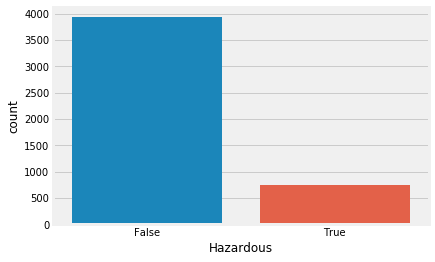

In [15]:
sns.countplot(x='Hazardous', data=nasa_data)
plt.show()

**A lot of asteroids detected are not dangerous for the planet**

In [16]:
nasa_data = nasa_data.drop(['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox'], axis=1)

In [17]:
X = nasa_data.drop('Hazardous', axis=1)
y = nasa_data['Hazardous']

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Question : Perform classification algorithm on the dataset without PCA 

### **Modelling**

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()  

start = time.time()
model.fit(X_train, y_train)
end = time.time()

training_time = end-start
print("Time taken to train Logistic Regression: ", training_time)

Time taken to train Logistic Regression:  0.1822371482849121


C:\Users\Aravind\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
pred= model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

Confusion Matrix: 
 [[1273   35]
 [  89  150]]


In [24]:
print('Classification Report: \n', classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

       False       0.93      0.97      0.95      1308
        True       0.81      0.63      0.71       239

    accuracy                           0.92      1547
   macro avg       0.87      0.80      0.83      1547
weighted avg       0.92      0.92      0.92      1547



In [25]:
print("Accuracy: \n", accuracy_score(y_test, pred))

Accuracy: 
 0.9198448610213316


## Question : Identify the number of components required to explain 99% of variance

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pca.explained_variance_ratio_[:16].sum()

0.9983423155751552

**17 components explain 99% of the variance in the dataset**

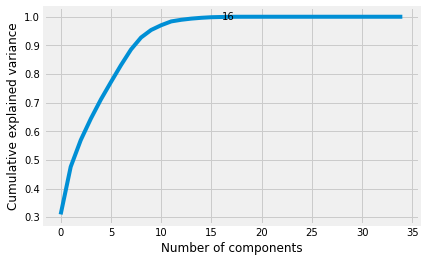

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('16',xy=(16, .99))
plt.show()

## Question : Perform PCA followed by classification using the previous algorithm and compare the results

In [33]:
x_pca = PCA(n_components=16)
x_pca.fit(X_train)

X_train_pca = x_pca.transform(X_train)
X_test_pca = x_pca.transform(X_test)

In [34]:
model = LogisticRegression()  

start = time.time()
model.fit(X_train_pca, y_train)
end = time.time()

training_time = end-start
print("Time taken to train Logistic Regression: ", training_time)

Time taken to train Logistic Regression:  0.04401230812072754


C:\Users\Aravind\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
pred_pca = model.predict(X_test_pca)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Confusion Matrix:  \n", confusion_matrix(y_test, pred_pca))

Confusion Matrix:  
 [[1271   37]
 [  82  157]]


In [37]:
print("Classification Report: \n", classification_report(y_test, pred_pca))

Classification Report: 
               precision    recall  f1-score   support

       False       0.94      0.97      0.96      1308
        True       0.81      0.66      0.73       239

    accuracy                           0.92      1547
   macro avg       0.87      0.81      0.84      1547
weighted avg       0.92      0.92      0.92      1547



In [38]:
print("Accuracy: \n ", accuracy_score(y_test, pred_pca))

Accuracy: 
  0.9230769230769231
